In [1]:
import pandas as pd


# Task 1. Key figures (2 points)

Calculate the relevant statistics using Python for the values 4, 2, 5, 6, 1, 6, 8, 3, 4, 9 and answer the questions

## Standard Deviation

In [15]:
df = pd.DataFrame([4, 2, 5, 6, 1, 6, 8, 3, 4, 9 ], columns=['no'])
df = df.sort_values(by='no', ignore_index=True)
print("Standard Deviation: {}".format(df.no.std(axis=0)))


Standard Deviation: 2.5298221281347035


In [58]:
df.no.values


array([1, 2, 3, 4, 4, 5, 6, 6, 8, 9])

## Skewness

In [40]:
print('Mean: {}'.format(df.mean().values.squeeze()))
print('Median: {}'.format(df.median().values.squeeze()))
print('Mean is greater than median.')
# df.groupby('no').size().plot(x="Number", y="Frequency")


Mean: 4.8
Median: 4.5
Mean is greater than median.


It is even hard to decipher the skewness on the plot.


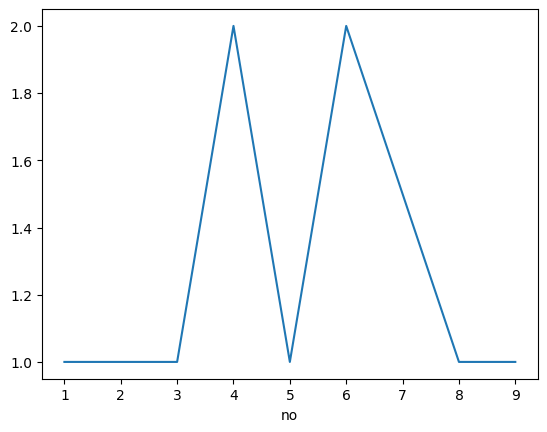

In [46]:
df.groupby('no').size().plot(x="Number", y="Frequency")
print("It is even hard to decipher the skewness on the plot.")


In [47]:
print("Unbiased Skewness: {}".format(df.skew().values.squeeze()))
print("The data is positively skewed.")


Unbiased Skewness: 0.22852397153560583
The data is positively skewed.


## Quartiles

In [56]:
for i in range(5):
    print("Q{}: {}".format(i, df.quantile(i/4).values.squeeze()))


Q0: 1.0
Q1: 3.25
Q2: 4.5
Q3: 6.0
Q4: 9.0


## Outliers

Here we try 2-$\sigma$ method

In [73]:
sigma = df.no.std()
mean = df.no.mean()
lower_bound = mean - 2 * sigma
upper_bound = mean + 2 * sigma
for no in df.no:
    if no < lower_bound or\
        no > upper_bound:
        print(no)

print("No value is outside the range of 2-sigma, so there is no outliers")


No value is outside the range of 2-sigma, so there is no outliers


# Task 2. Correlation


Write a function that calculates the Pearson correlation coefficient between two variables. In this
subtask, you are not allowed to use any packages

In [142]:
# Here we assume the inputs are lists
def add(A, B):
    assert len(A) == len(B)
    C = []
    for i in range(len(A)):
        C.append(A[i] + num * B[i])
    return C

def scalar_mul(A, num):
    C = []
    for i in range(len(A)):
        C.append(A[i] * num)
    return C

def dot(A, B):
    assert len(A) == len(B)
    sum = 0
    for i in range(len(A)):
        sum += A[i] * B[i]
    return sum

def standard_deviation(A, B):
    assert len(A) == len(B)
    n = len(A)
    mean_A, mean_B = sum(A)/n, sum(B)/n
    # subtract the lists by their mean
    A_, B_ = [], []
    for i in range(len(A)):
        A_.append(A[i] - mean_A)
        B_.append(B[i] - mean_B)
    return (dot(A_, B_)/(n-1))**0.5


def pearson_correlation(A, B):
    return standard_deviation(A,B)**2/(standard_deviation(A,A)*standard_deviation(B,B))


In [143]:
import numpy as np
A, B = np.random.randn(5), np.random.randn(5)
A = list(A); B = list(B)


In [148]:
print(pearson_correlation(A,B))
print(np.corrcoef(A,B)[0,1])


0.06481018544607428
0.0648101854460743



Import the file icecream.csv in the folder data as a table in a Python editor. Examine the data and
perform Data Cleaning if necessary.
What needs to be considered before the correlation coefficient can be calculated? (1.5 P.)

In [149]:
df2 = pd.read_csv("data/icecream.csv")
df2


,Temperature,Ice_Cream_Sales
0,14.2,215
1,16.4,325
2,11.9,185
3,15.2,332
4,18.5,406
5,22.1,522
6,19.4,412
7,25.1,614
8,23.4,544
9,18.1,421


** Note: 
- There is no missing entries in the dataset.
- There seems to be no redundancies/duplications.
- There seems to be no inconsistancies.

In [164]:
mean_t, mean_sales = df2.mean()
std_t, std_sales = df2.std()
print((df2["Temperature"]> mean_t + 2*std_t) | (df2["Temperature"]< mean_t - 2*std_t))
print((df2["Ice_Cream_Sales"]> mean_sales + 2*std_sales) | (df2["Ice_Cream_Sales"]< mean_sales - 2*std_sales))


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
Name: Temperature, dtype: bool
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
Name: Ice_Cream_Sales, dtype: bool


** Note: 
- There is no outliers outside 2-$\sigma$ range

Before calculating the correlation coefficient between the two features, 
it is necessary to normalize the data, since the order of magnitude of the 
two set of quantities are clearly different (10 vs 100)

Here we use min-max normalization

----Update----

In fact, the normalization is already done during the correlation coefficient
calculation. A pre-normalization **does not** affect the final result at all. See
the comparison below.

Moreover, we shall be aware that the Pearson's corelation coefficient may only
show linear correlation.

In [167]:
df2_norm = (df2 - df2.min()) / (df2.max() - df2.min())
df2_norm


,Temperature,Ice_Cream_Sales
0,0.174242,0.069930
1,0.340909,0.326340
2,0.000000,0.000000
3,0.250000,0.342657
4,0.500000,0.515152
5,0.772727,0.785548
6,0.568182,0.529138
7,1.000000,1.000000
8,0.871212,0.836830
9,0.469697,0.550117


Calculate the correlation coefficient between Temperature and Sales. Interpret the result

In [169]:
df2_norm.corr()


,Temperature,Ice_Cream_Sales
Temperature,1.000000,0.957507
Ice_Cream_Sales,0.957507,1.000000


In [175]:
print("Pearson's correlation coefficient")
print(df2.corr())
print("The temperature and ice cream sales are highly positively correlated.")


Pearson's correlation coefficient
                 Temperature  Ice_Cream_Sales
Temperature         1.000000         0.957507
Ice_Cream_Sales     0.957507         1.000000
The temperature and ice cream sales are highly positively correlated.


We clearly see a positive linear correlation through the plot.


/home/hongli/anaconda3/envs/APAlg/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


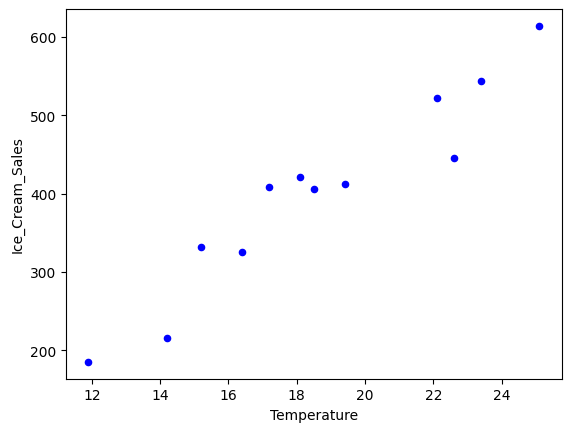

In [186]:
df2.plot("Temperature","Ice_Cream_Sales",kind="scatter", c = "b")
print("We clearly see a positive linear correlation through the plot.")
